In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../ml')
from VarMiON import *

In [5]:
Theta_test = torch.rand((100,12,12),dtype=torch.float)
F_test = torch.rand((100,144),dtype=torch.float)
N_test = torch.rand((100,144),dtype=torch.float)
x_test = torch.rand((100,268,2),dtype=torch.float)
u_test = torch.rand((100,268),dtype=torch.float)

### Trunk

In [3]:
#Own implementation
GaussianRBF(2,72).forward(x_test).shape

torch.Size([100, 268, 72])

In [4]:
#torch_rbf implementation
RBF(2,72,gaussian).forward(x_test).shape

torch.Size([100, 268, 72])

(array([1479241.,  121335.,   76057.,   57212.,   45741.,   38438.,
          33290.,   28894.,   26045.,   23347.]),
 array([1.27333194e-25, 9.99999419e-02, 1.99999884e-01, 2.99999833e-01,
        3.99999768e-01, 4.99999702e-01, 5.99999666e-01, 6.99999571e-01,
        7.99999535e-01, 8.99999440e-01, 9.99999404e-01]),
 <BarContainer object of 10 artists>)

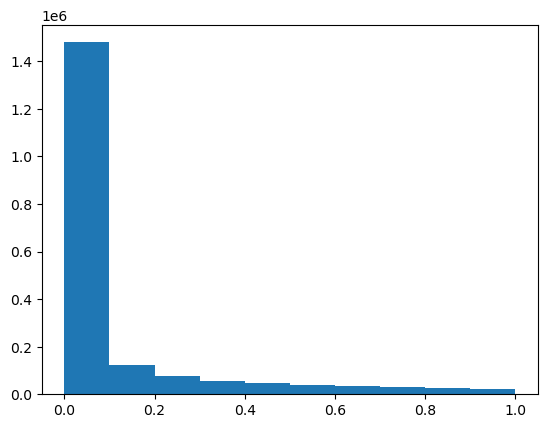

In [5]:
plt.hist(torch.abs((GaussianRBF(2,72).forward(x_test) - RBF(2,72,gaussian).forward(x_test))).flatten().detach().numpy())

In [6]:
x_g, y_g = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_grid = np.array([x_g, y_g]).T.reshape((10000,2))
x_grid.shape
x_grid = torch.tensor(x_grid)
f = GaussianRBF(2,3).forward(x_grid[:,None,None,:]).sum(-1).squeeze().detach().numpy()

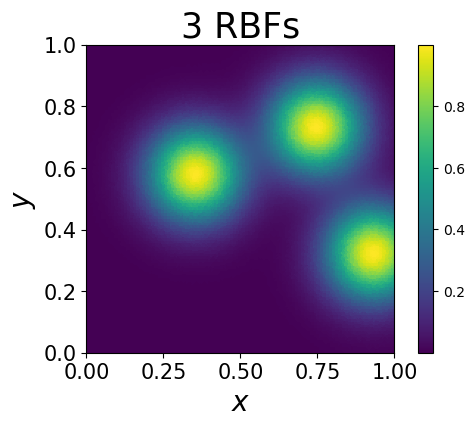

In [7]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x_grid[:,0], x_grid[:,1], f)
ax.set_title(r"3 RBFs", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)


### Non-linear branch

In [8]:
NLBranch = NLBranchNet()

In [9]:
output = NLBranch.forward(Theta_test)
print(output.shape)

torch.Size([100, 72, 72])


### Linear branch

In [10]:
LBranch = LBranchNet(144,72)

In [11]:
output = LBranch(F_test)
print(output.shape)

torch.Size([100, 72])


### VarMiON

In [12]:
Theta_test = torch.rand((100,12,12),dtype=torch.double)
F_test = torch.rand((100,144),dtype=torch.double)
N_test = torch.rand((100,144),dtype=torch.double)
x_test = torch.rand((100,268,2),dtype=torch.double)
u_test = torch.rand((100,268),dtype=torch.double)

In [13]:
hparams = {}
hparams['dtype'] = torch.float64
params = {}
params['hparams'] = hparams
model = VarMiON(params)

NLBranch.layers.0.weight
NLBranch.layers.0.bias
NLBranch.layers.2.weight
NLBranch.layers.2.bias
NLBranch.layers.3.weight
NLBranch.layers.3.bias
NLBranch.layers.5.weight
NLBranch.layers.5.bias
NLBranch.layers.6.weight
NLBranch.layers.6.bias
NLBranch.layers.8.weight
NLBranch.layers.8.bias
LBranchF.layers.0.weight
Trunk.mus
Trunk.log_sigmas


In [14]:
model.forward(Theta_test, F_test, N_test, x_test)

NLBranch: torch.Size([100, 72, 72])
LBranch: torch.Size([100, 72])
Branch: torch.Size([100, 72])
Trunk: torch.Size([100, 268, 72])
u_hat: torch.Size([100, 268])


tensor([[ -8.8350,  -7.2692,  -8.6166,  ...,  -8.2378,  -2.5035,  -0.4883],
        [ -8.7871,  -5.6955,  -7.6592,  ...,  -8.7428,  -2.5948,  -2.9455],
        [-14.6465,  -3.8588,  -1.8300,  ..., -16.6730, -10.4497,  -5.2788],
        ...,
        [ -2.6524,  -4.5277, -14.7666,  ..., -18.1591, -13.4783, -11.9676],
        [-15.4680, -14.9263,  -1.5523,  ...,  -8.8709,  -3.3582, -13.4561],
        [-13.4566, -12.8407,  -3.1595,  ..., -16.5488, -11.9897, -15.7974]],
       dtype=torch.float64, grad_fn=<ViewBackward0>)

In [18]:
A = torch.rand(100,12,12)

In [22]:
A.transpose(-1,-2).shape

torch.Size([100, 12, 12])

In [25]:
A.transpose(-1,-2).transpose(-1,-2) == A

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

In [29]:
torch.tile(A,(2,1,1)).shape

torch.Size([200, 12, 12])